# Analysis of current Counter Cleaner Errors

## Infos
- [GFD-1961](https://green-fusion.atlassian.net/browse/GFD-1961)
- [error filter in der datenbank](https://green-fusion.atlassian.net/browse/GFD-753)
- [Counter Cleaner](https://www.notion.so/green-fusion/Counter-Cleaner-47de96e809a24a27b6682550a53c6652)

In [1]:
#imports
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# functions
## Function to show both % and count
def make_autopct(values):
    def autopct(pct):
        count = int(round(pct / 100. * sum(values)))
        return f'{pct:.1f}%\n({count})'
    return autopct

## Get data

In [3]:
# Load CSV file into DataFrame
#df = pd.read_csv("_WITH_LatestCreated_AS_SELECT_dccm_sensor_id_MAX_dccm_created_at_202505221126.csv")
df = pd.read_csv("df_latest_errors_2025-07-08.csv")

In [4]:
#filter to obtain the metertype
def get_meter_type(acronym):
    if isinstance(acronym, str):
        if '_hm' in acronym:
            return 'heat_meter'
        elif '_gm' in acronym:
            return 'gas_meter'
        elif '_em' in acronym:
            return 'electricity_meter'
    return 'other'

df['meter_type'] = df['acronym'].apply(get_meter_type)

In [5]:
df.head()

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
0,111,4,e_chp(n)_hm,No complete data.,2024-09-30 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,2.0,163427,E WMZ BHKW (n),Wärme Wärmemengenzähler Blockheizkraftwerk (n),heat_meter
1,195,8,e_hw(n)_hm,No complete data.,2025-05-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,6.0,161796,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
2,113,20,e_g_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,142098,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
3,113,21,e_hw(n)_hm,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,6.0,142122,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
4,114,24,e_hc(n)_hm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1.0,1.0,5.0,142146,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter


In [6]:
df.tail()

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
444,1850,34151,eel_hp(n)_em_supply_act,No complete data.,2025-05-31 23:59:59+00:00,GREENBOX_MQTT,kWh,0.01,2.0,400.0,163315,Eel supply act SZ WP (n),verbrauchte el. Wirkenergie Stromzähler Wärmep...,electricity_meter
445,1698,34446,e_lh(n)_hmsubs,No values greater than 0.,2025-05-31 23:59:59+00:00,GREENBOX_MQTT,kWh,1.00,1.0,465.0,163321,E WMZ SUBS NW (n),Wärme Wärmemengenzähler Unterstation Nahwärmen...,heat_meter
446,1850,34451,eel_hp(n)_em_supply_act,No complete data.,2025-05-31 23:59:59+00:00,GREENBOX_MQTT,kWh,0.01,1.0,400.0,163322,Eel supply act SZ WP (n),verbrauchte el. Wirkenergie Stromzähler Wärmep...,electricity_meter
447,2001,34835,eel_hp(n)_em_supply_act,No complete data.,2025-05-31 23:59:59+00:00,GREENBOX_MQTT,kWh,1.00,1.0,400.0,163330,Eel supply act SZ WP (n),verbrauchte el. Wirkenergie Stromzähler Wärmep...,electricity_meter
448,2002,34992,eel_hp(n)_em_supply_act,No complete data.,2025-05-31 23:59:59+00:00,GREENBOX_MQTT,kWh,1.00,1.0,400.0,163333,Eel supply act SZ WP (n),verbrauchte el. Wirkenergie Stromzähler Wärmep...,electricity_meter


In [7]:
# basic data analysis from the strings 
df.describe(include=['object']) 

,acronym,error,reference_date,source,unit,short_name,long_name,meter_type
count,402,449,449,449,448,441,429,449
unique,15,7,27,5,3,44,32,4
top,e_hc(n)_hm,No complete data.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
freq,85,296,109,219,306,85,85,256


## Datetime consideration (miss created at)

In [8]:
# string to datetime
#df['created_at'] = pd.to_datetime(df['created_at'])
df['reference_date'] = pd.to_datetime(df['reference_date'])

In [9]:
#dates consideration
if False:
    # Earliest (oldest) timestamp
    earliest = df['created_at'].min()
    
    # Latest (most recent) timestamp
    latest = df['created_at'].max()
    print("created_at")
    print("Earliest timestamp:", earliest)
    print("Latest timestamp:", latest)
    print(20*"--")
    # Earliest (oldest) timestamp
    earliest = df['reference_date'].min()
    
    # Latest (most recent) timestamp
    latest = df['reference_date'].max()
    print("reference_date")
    print("Earliest timestamp:", earliest)
    print("Latest timestamp:", latest)


## Error Type

In [10]:
#type of error
error_counts=df['error'].dropna().value_counts()
error_counts

error
No complete data.                                                          296
No values greater than 0.                                                   71
Data is empty.                                                              34
Series cannot be transformed to be monotonic increasing. Deleting data.     27
No values after removing drops.                                             19
Less than 24 hours of data.                                                  1
Data is constant at 0.0.                                                     1
Name: count, dtype: int64

In [11]:
sum(error_counts)

449

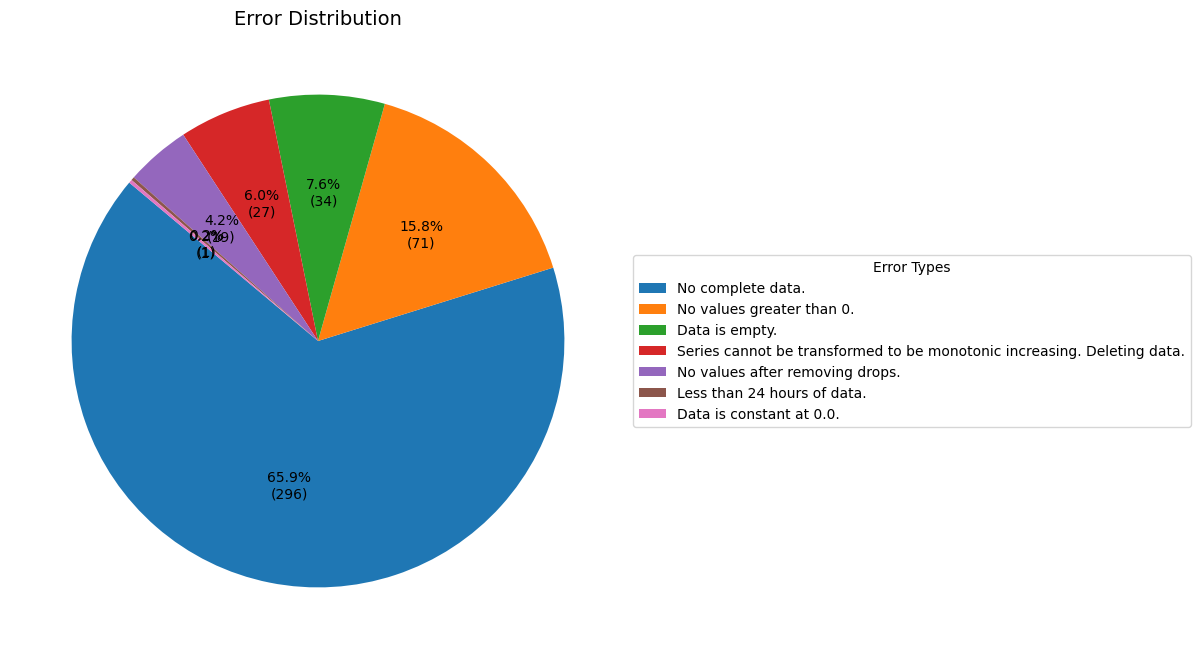

In [12]:
# Plot pie chart
       
if True:   
    # Create pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot pie without labels
    wedges, texts, autotexts = ax.pie(
        error_counts,
        labels=None,
        autopct=make_autopct(error_counts),
        startangle=140,
        textprops={'fontsize': 10}
    )
    
    # Add vertical legend outside
    ax.legend(
        wedges,
        error_counts.index,
        title="Error Types",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    
    ax.set_title("Error Distribution", fontsize=14)
    #plt.tight_layout()
    plt.show()
    # export
    #plt.savefig("pics/error_Distribution_chart.jpg")

In [13]:
# pic 5 occurence of each errors
sampled_list = []

for meter_type_val, group_df in df.groupby('error'):
    sample_size = min(5, len(group_df))
    sampled = group_df.sample(n=sample_size, replace=False)
    sampled_list.append(sampled)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)

#sort
df_sampled_sorted = df_sampled.sort_values(by='error').reset_index(drop=True)
df_sampled_sorted[["building_id","acronym","error","sensor_id"]]

,building_id,acronym,error,sensor_id
0,1799,NaN,Data is constant at 0.0.,33632
1,294,e_hc(n)_hm,Data is empty.,2895
2,417,e_hc(n)_hm,Data is empty.,7690
3,300,e_g_hm,Data is empty.,3434
4,262,e_hc(n)_hm,Data is empty.,3338
5,436,e_hc(n)_hm,Data is empty.,7789
6,2298,NaN,Less than 24 hours of data.,4584
7,1370,v_b(n)_gm,No complete data.,31849
8,2002,eel_hp(n)_em_supply_act,No complete data.,34992
9,194,e_g_hm,No complete data.,547


## source

In [14]:
#type of error
counter_source_count=df['source'].dropna().value_counts()
counter_source_count

source
GETEC_MQTT          219
GREENBOX_MQTT       144
LAVA_API             53
GREENBOX_OPC         17
MANUALLY_ENTERED     16
Name: count, dtype: int64

In [15]:
sum(error_counts)

449

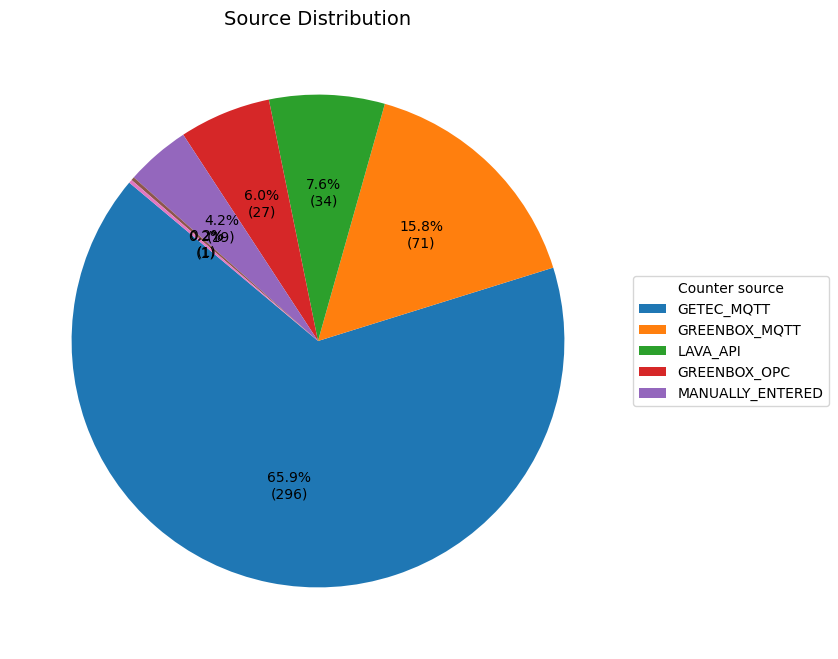

In [16]:
# Plot pie chart
       
if True:   
    # Create pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot pie without labels
    wedges, texts, autotexts = ax.pie(
        error_counts,
        labels=None,
        autopct=make_autopct(counter_source_count),
        startangle=140,
        textprops={'fontsize': 10}
    )
    
    # Add vertical legend outside
    ax.legend(
        wedges,
        counter_source_count.index,
        title="Counter source",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    
    ax.set_title("Source Distribution", fontsize=14)
    #plt.tight_layout()
    plt.show()
    # export
    #plt.savefig("pics/error_Distribution_chart.jpg")

In [17]:
# pic 5 occurence of each errors
sampled_list = []

for meter_type_val, group_df in df.groupby('source'):
    sample_size = min(5, len(group_df))
    sampled = group_df.sample(n=sample_size, replace=False)
    sampled_list.append(sampled)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)

#sort
df_sampled_sorted = df_sampled.sort_values(by='source').reset_index(drop=True)
df_sampled_sorted[["building_id","acronym","error","sensor_id",'source']]

,building_id,acronym,error,sensor_id,source
0,272,v_g_gm,No complete data.,270,GETEC_MQTT
1,140,e_hc(n)_hm,No values greater than 0.,130,GETEC_MQTT
2,106,e_hc(n)_hm,No values greater than 0.,199,GETEC_MQTT
3,253,e_hc(n)_hm,No complete data.,1782,GETEC_MQTT
4,267,e_hw(n)_hm,Data is empty.,472,GETEC_MQTT
5,392,NaN,Series cannot be transformed to be monotonic i...,7127,GREENBOX_MQTT
6,1850,eel_hp(n)_em_supply_act,No complete data.,34451,GREENBOX_MQTT
7,1662,v_b(n)_gm,Series cannot be transformed to be monotonic i...,31128,GREENBOX_MQTT
8,326,e_hc(n)_hm,No complete data.,3883,GREENBOX_MQTT
9,1454,v_b(n)_gm,Series cannot be transformed to be monotonic i...,23103,GREENBOX_MQTT


## acronym

In [18]:
#type of acronym
acronym_counts=df['acronym'].dropna().value_counts()
acronym_counts

acronym
e_hc(n)_hm                     85
v_g_gm                         78
e_hw(n)_hm                     73
e_g_hm                         64
v_b(n)_gm                      49
e_b(n)_hm                      14
eel_hp(n)_em_supply_act        11
e_dh_hm                         9
e_chp(n)_hm                     6
v_chp(n)_gm                     6
e_g_hmalt                       2
e_hc(n)_hmalt                   2
eel_chp(n)_em_discharge_act     1
eel_chp(n)_em_supply_act        1
e_lh(n)_hmsubs                  1
Name: count, dtype: int64

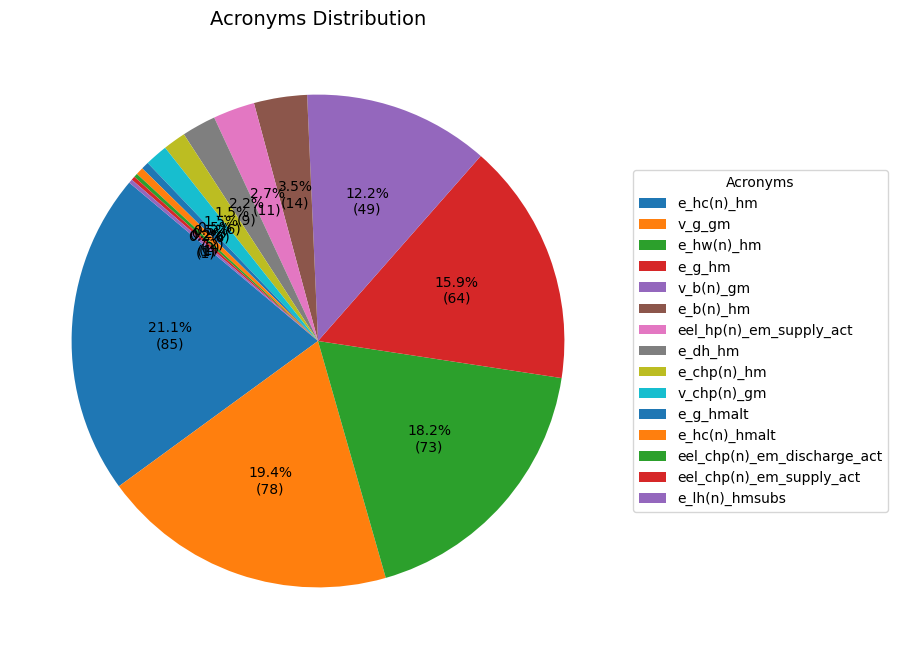

In [19]:
# Plot pie chart
if True:
    # Create pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot pie without labels
    wedges, texts, autotexts = ax.pie(
        acronym_counts,
        labels=None,
        autopct=make_autopct(acronym_counts),
        startangle=140,
        textprops={'fontsize': 10}
    )
    
    # Add vertical legend outside
    ax.legend(
        wedges,
        acronym_counts.index,
        title="Acronyms",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    
    ax.set_title("Acronyms Distribution", fontsize=14)
    #plt.tight_layout()
    plt.show()# Or use plt.savefig("error_pie_chart.pdf")
    # export
    #plt.savefig("pics/Acronyms_Distribution_chart.jpg")

In [20]:
# pic 2 occurence of each errors
sampled_list = []

for meter_type_val, group_df in df.groupby('acronym'):
    sample_size = min(2, len(group_df))
    sampled = group_df.sample(n=sample_size, replace=False)
    sampled_list.append(sampled)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)

#sort
df_sampled_sorted = df_sampled.sort_values(by='acronym').reset_index(drop=True)
df_sampled_sorted[["building_id","acronym","error","sensor_id","source"]]

,building_id,acronym,error,sensor_id,source
0,1360,e_b(n)_hm,No complete data.,23426,GREENBOX_MQTT
1,385,e_b(n)_hm,No complete data.,5627,LAVA_API
2,396,e_chp(n)_hm,No complete data.,5866,GETEC_MQTT
3,1360,e_chp(n)_hm,No values greater than 0.,23441,GREENBOX_MQTT
4,749,e_dh_hm,No complete data.,12024,GREENBOX_MQTT
5,1739,e_dh_hm,No complete data.,28354,GREENBOX_MQTT
6,145,e_g_hm,No complete data.,354,GETEC_MQTT
7,404,e_g_hm,No complete data.,6765,LAVA_API
8,2224,e_g_hmalt,Series cannot be transformed to be monotonic i...,7026,GREENBOX_OPC
9,414,e_g_hmalt,Series cannot be transformed to be monotonic i...,7051,GREENBOX_MQTT


## Meter types

In [21]:
meter_type=df['meter_type'].dropna().value_counts()
meter_type

meter_type
heat_meter           256
gas_meter            133
other                 47
electricity_meter     13
Name: count, dtype: int64

In [22]:
sum(meter_type)

449

In [23]:
df.loc[df['meter_type'] == 'other']

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
5,101,35,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.000,1.0,NaN,142194,T VL SL 1,Vorlauftemperatur Speicherladung 1,other
31,142,202,NaN,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.000,1.0,NaN,143322,T VL SL 1,Vorlauftemperatur Speicherladung 1,other
71,111,506,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.000,1.0,NaN,145338,T RL Sek,Rücklauftemperatur Sekundär,other
109,142,961,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.000,1.0,NaN,146874,T RL SL 1,Rücklauftemperatur Speicherladung 1,other
115,142,1011,NaN,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.000,1.0,NaN,147066,T VL SL 1,Vorlauftemperatur Speicherladung 1,other
152,101,1553,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.000,2.0,NaN,149034,T VL SL 2,Vorlauftemperatur Speicherladung 2,other
197,2,2540,NaN,No complete data.,2025-06-30 23:59:59+00:00,GREENBOX_OPC,kWh,1.000,1.0,NaN,163907,Wärmemenge WZ_HGWP1,heat meter,other
198,2,2574,NaN,No complete data.,2025-06-30 23:59:59+00:00,GREENBOX_OPC,kWh,1.000,1.0,NaN,163908,Wärmemenge WZ_HK1,heat meter,other
199,2,2595,NaN,No complete data.,2025-06-30 23:59:59+00:00,GREENBOX_OPC,kWh,1.000,2.0,NaN,163909,Wärmemenge WZ_HK2,heat meter,other
200,2,2610,NaN,No complete data.,2025-06-30 23:59:59+00:00,GREENBOX_OPC,kWh,1.000,1.0,NaN,163910,Wärmemenge WZ_QK,heat meter,other


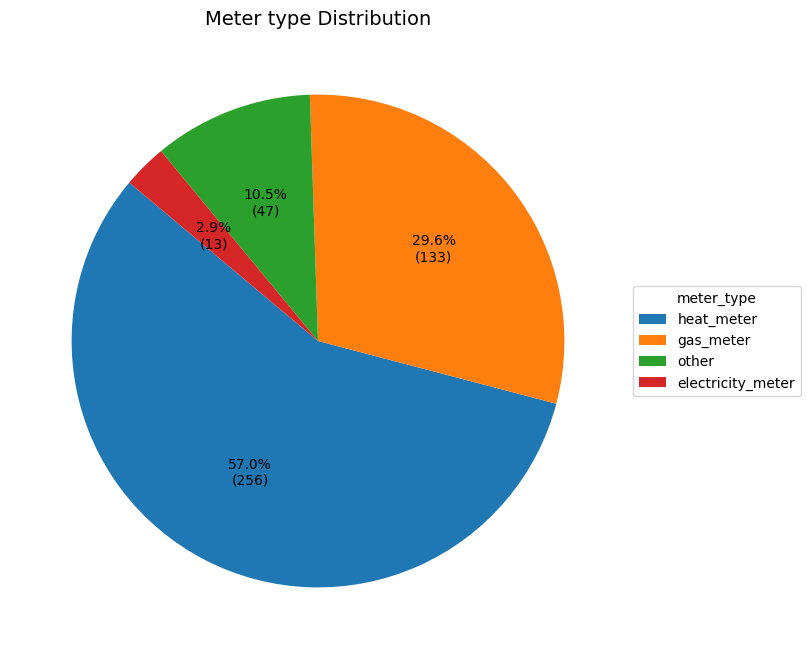

In [24]:
# Plot pie chart
if True:
    # Create pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot pie without labels
    wedges, texts, autotexts = ax.pie(
        meter_type,
        labels=None,
        autopct=make_autopct(meter_type),
        startangle=140,
        textprops={'fontsize': 10}
    )
    
    # Add vertical legend outside
    ax.legend(
        wedges,
        meter_type.index,
        title="meter_type",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    
    ax.set_title("Meter type Distribution", fontsize=14)
    #plt.tight_layout()
    plt.show()# Or use plt.savefig("error_pie_chart.pdf")
    # export
    #plt.savefig("pics/Acronyms_Distribution_chart.jpg")

In [25]:
# pic 5 occurence of meter type
sampled_list = []

for meter_type_val, group_df in df.groupby('meter_type'):
    sample_size = min(5, len(group_df))
    sampled = group_df.sample(n=sample_size, replace=False)
    sampled_list.append(sampled)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)
#sort
df_sampled_sorted = df_sampled.sort_values(by='meter_type').reset_index(drop=True)
df_sampled_sorted[["building_id","meter_type","error","sensor_id","acronym","source"]]

,building_id,meter_type,error,sensor_id,acronym,source
0,1404,electricity_meter,No complete data.,20825,eel_hp(n)_em_supply_act,GREENBOX_MQTT
1,2002,electricity_meter,No complete data.,34992,eel_hp(n)_em_supply_act,GREENBOX_MQTT
2,1901,electricity_meter,No complete data.,28610,eel_hp(n)_em_supply_act,GREENBOX_MQTT
3,2001,electricity_meter,No complete data.,34835,eel_hp(n)_em_supply_act,GREENBOX_MQTT
4,1850,electricity_meter,No complete data.,34451,eel_hp(n)_em_supply_act,GREENBOX_MQTT
5,152,gas_meter,No complete data.,521,v_g_gm,GETEC_MQTT
6,376,gas_meter,No complete data.,5567,v_g_gm,LAVA_API
7,1675,gas_meter,No values greater than 0.,26478,v_b(n)_gm,GREENBOX_MQTT
8,1826,gas_meter,No values greater than 0.,31755,v_g_gm,GREENBOX_MQTT
9,754,gas_meter,No complete data.,9490,v_g_gm,LAVA_API


## correlation

## Filter by Data is empty and No values greater than 0
- error : 'No values greater than 0', 'Data is empty'
- Meter type : 'gas_meter', 'heat_meter'

In [26]:
# filter by error type
filtered_df = df.loc[(df['error'] == 'Data is empty.') | (df['error'] == 'No values greater than 0.')]
# filter meter_type
filtered_df = filtered_df.loc[(df['meter_type'] == 'gas_meter') | (filtered_df['meter_type'] == 'heat_meter')]
# group by keep 5 random entries
group_cols = ['error', 'meter_type']
sampled_list = []

for group_vals, indices in filtered_df.groupby(group_cols).groups.items():
    group_df = filtered_df.loc[indices]
    sample_size = min(5, len(group_df))
    sampled = group_df.sample(n=sample_size, replace=False)
    sampled_list.append(sampled)

df_sampled = pd.concat(sampled_list).reset_index(drop=True)
#sort result
df_sampled_sorted = df_sampled.sort_values(by=['error','meter_type']).reset_index(drop=True)
#display the necessary
df_sampled_sorted#[["building","meter_type","error","sensor_id"]]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
0,267,249,v_g_gm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,m³,1.0,1.0,133.0,143730,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
1,114,152,v_g_gm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,m³,1.0,1.0,133.0,142890,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
2,375,7163,v_g_gm,Data is empty.,2023-11-30 23:59:59+00:00,LAVA_API,m³,1.0,1.0,133.0,155568,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
3,436,7790,v_g_gm,Data is empty.,2023-12-31 23:59:59+00:00,GETEC_MQTT,m³,1.0,1.0,133.0,155851,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
4,102,721,v_g_gm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,m³,1.0,1.0,133.0,146442,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
5,247,3405,e_g_hm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1.0,1.0,4.0,151722,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
6,267,472,e_hw(n)_hm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1.0,1.0,6.0,145242,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
7,250,3387,e_g_hm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1.0,1.0,4.0,151674,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
8,197,1379,e_hc(n)_hm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1.0,1.0,5.0,148458,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
9,114,24,e_hc(n)_hm,Data is empty.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1.0,1.0,5.0,142146,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter


## analysis of strange heat meter behavior

In [27]:
# filter by error type
filtered_df = df.loc[(df['error'] == 'No values after removing drops.') | (df['error'] == 'No complete data. ')].sort_values(by=['error']).reset_index(drop=True)
filtered_df[["building_id","meter_type","error","sensor_id"]].sort_values(by=['sensor_id']).reset_index(drop=True).head()#.iloc[5:]

,building_id,meter_type,error,sensor_id
0,111,heat_meter,No complete data.,4
1,195,heat_meter,No complete data.,8
2,113,heat_meter,No values after removing drops.,20
3,101,other,No values after removing drops.,35
4,118,gas_meter,No complete data.,41


In [28]:
list_of_strange_heat_meter_1=[162,216,258,354,740,844,954,1685,1739] #interfereces
list_of_strange_heat_meter_2=[35,506,961,1553,13196] # rauschen
list_of_strange_heat_meter_3=[661,1632,25797] # no data since x time
list_of_strange_heat_meter_4=[1903,1910,2195,2209,13008,13014,13022,13024] # jumps / drops but count
list_of_strange_heat_meter_5=[2989,4911,20825] #  outliers but counts
list_of_strange_heat_meter_6=[6932,6934,10072] # where's the problem ?

### interference

![](pics/interferences.png)

In [29]:
df.loc[df['sensor_id'].isin(list_of_strange_heat_meter_1)]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
23,141,162,e_g_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,142962,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
34,148,216,e_hc(n)_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,5.0,143394,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
41,147,258,e_g_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,143778,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
54,145,354,e_g_hm,No complete data.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,144546,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
99,103,740,e_hc(n)_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,5.0,146514,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
103,135,844,e_hc(n)_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,5.0,146658,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
108,157,954,e_g_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,146850,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
165,144,1685,e_g_hm,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,149706,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
171,136,1739,e_g_hm,No complete data.,2023-10-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.0,1.0,4.0,150025,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter


### rauschen

![](pics/rauschen.png)

In [30]:
df.loc[df['sensor_id'].isin(list_of_strange_heat_meter_2)]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
5,101,35,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.0,1.0,NaN,142194,T VL SL 1,Vorlauftemperatur Speicherladung 1,other
71,111,506,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.0,1.0,NaN,145338,T RL Sek,Rücklauftemperatur Sekundär,other
109,142,961,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.0,1.0,NaN,146874,T RL SL 1,Rücklauftemperatur Speicherladung 1,other
152,101,1553,NaN,No values after removing drops.,2023-03-31 23:59:59+00:00,GETEC_MQTT,°C,1.0,2.0,NaN,149034,T VL SL 2,Vorlauftemperatur Speicherladung 2,other
355,600,13196,e_dh_hm,No complete data.,2025-03-31 23:59:59+00:00,GREENBOX_MQTT,kWh,1.0,1.0,3.0,161307,E WMZ FW,Wärme Wärmemengenzähler Fernwärme,heat_meter


### no data since x time

![](pics/nodatasincextime.png)

In [31]:
df.loc[df['sensor_id'].isin(list_of_strange_heat_meter_3)]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
85,198,661,v_g_gm,No complete data.,2025-02-28 23:59:59+00:00,GETEC_MQTT,m³,1.00,1.0,133.0,159515,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
158,198,1632,e_hw(n)_hm,No complete data.,2025-02-28 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,6.0,159701,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
409,1864,25797,v_b(n)_gm,No complete data.,2025-03-31 23:59:59+00:00,GREENBOX_MQTT,m³,0.01,1.0,128.0,161607,V GZ K (n),Volumen Gaszähler Kessel (n),gas_meter


### jump / drop and count

![](pics/jumpdrops.png)

In [32]:
df.loc[df['sensor_id'].isin(list_of_strange_heat_meter_4)]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
188,137,1903,e_hw(n)_hm,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,6.0,150714,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
191,137,1910,e_hc(n)_hm,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,5.0,150810,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
192,162,2195,e_hc(n)_hm,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,5.0,150906,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
195,162,2209,e_hw(n)_hm,No values greater than 0.,2023-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,6.0,151074,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
351,388,13008,e_hw(n)_hm,No complete data.,2024-12-31 23:59:59+00:00,GREENBOX_MQTT,kWh,0.10,1.0,6.0,157130,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
352,388,13014,v_g_gm,No complete data.,2024-12-31 23:59:59+00:00,GREENBOX_MQTT,m³,0.10,NaN,133.0,157141,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
353,427,13022,v_g_gm,No complete data.,2025-03-31 23:59:59+00:00,GREENBOX_MQTT,m³,0.01,NaN,133.0,161295,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
354,427,13024,e_hw(n)_hm,No complete data.,2025-03-31 23:59:59+00:00,GREENBOX_MQTT,kWh,1.00,1.0,6.0,161297,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter


### outliers but counts

![](pics/outliers.png)

In [33]:
df.loc[df['sensor_id'].isin(list_of_strange_heat_meter_5)]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
211,304,2989,e_g_hm,No complete data.,2024-11-30 23:59:59+00:00,GREENBOX_MQTT,kWh,1.00,1.0,4.0,151574,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
257,304,4911,v_g_gm,No complete data.,2024-11-30 23:59:59+00:00,GREENBOX_MQTT,m³,0.01,1.0,133.0,153058,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
376,1404,20825,eel_hp(n)_em_supply_act,No complete data.,2025-03-31 23:59:59+00:00,GREENBOX_MQTT,kWh,1.00,1.0,400.0,161436,Eel supply act SZ WP (n),verbrauchte el. Wirkenergie Stromzähler Wärmep...,electricity_meter


## Case data stops to flow

In [34]:
filtered_df = df.loc[(df['error'] == 'Data is empty.')].sort_values(by=['meter_type']).reset_index(drop=True)
#list(filtered_df.sort_values(by=['address']).reset_index(drop=True)["sensor_id"].iloc[25:30])


In [35]:
list_of_meter_data_that_stoped_flowing=set([361,424,394,387,323,661,1632,25797,1606,1574,1698,550,1537,621,102,13590,1731, 703, 1779, 1805, 1056,361, 708, 1292, 1325, 904]) 
list_of_meter_data_schow_nothing_in_2_years=set([3417, 3396, 3405, 87, 672, 2886, 1722, 152, 24]) 
df.loc[df['sensor_id'].isin(list_of_meter_data_that_stoped_flowing)].reset_index(drop=True)#[["building","meter_type","error","acronym_n","sensor_id"]]

,building_id,sensor_id,acronym,error,reference_date,source,unit,factor,hydraulic_location_index,gf_standard_id,id,short_name,long_name,meter_type
0,269,102,e_hw(n)_hm,No complete data.,2024-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,6.0,142590,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
1,182,323,e_hc(n)_hm,No complete data.,2023-10-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,5.0,144289,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
2,220,361,e_hc(n)_hm,No complete data.,2023-10-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,5.0,144625,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
3,180,387,e_g_hm,No complete data.,2024-11-30 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,4.0,144806,E WMZ GL,Wärme Wärmemengenzähler Global,heat_meter
4,129,394,v_g_gm,No complete data.,2023-12-31 23:59:59+00:00,GETEC_MQTT,m³,1.00,1.0,133.0,144867,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
5,169,424,e_hw(n)_hm,No complete data.,2024-11-30 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,6.0,145022,E WMZ WW (n),Wärme Wärmemengenzähler Warmwasser (n),heat_meter
6,269,550,v_g_gm,No complete data.,2024-09-30 23:59:59+00:00,GETEC_MQTT,m³,1.00,1.0,133.0,145548,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
7,116,621,e_hc(n)_hm,No complete data.,2024-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,5.0,145902,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter
8,198,661,v_g_gm,No complete data.,2025-02-28 23:59:59+00:00,GETEC_MQTT,m³,1.00,1.0,133.0,159515,V GZ GL,Volumen Gaszähler Gesamt,gas_meter
9,209,703,e_hc(n)_hm,No complete data.,2024-03-31 23:59:59+00:00,GETEC_MQTT,kWh,1000.00,1.0,5.0,146358,E WMZ HK (n),Wärme Wärmemengenzähler Heizkreis (n),heat_meter


ticket that explains some of the data:
- [GETEC buildings DOWN](https://green-fusion.atlassian.net/browse/GF-9851)